In [20]:
#pip install pandas-ta

     |████████████████████████████████| 115 kB 991 kB/s eta 0:00:01
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218922 sha256=a6182d47f67f1e7a0bfcc16c821b6c0c0b73377642997675c417225d9e1a91c8
  Stored in directory: /Users/dashickscott/Library/Caches/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta
Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_ta #moving avg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [3]:
#load the data 
amzn_df = pd.read_csv('AMZN.csv')

In [4]:
#Inspect it 
print(amzn_df)

           Date        Open        High         Low       Close   Adj Close  \
0    2021-08-16  164.149994  165.000000  160.556503  164.949493  164.949493   
1    2021-08-17  163.875000  164.024506  161.283997  162.098007  162.098007   
2    2021-08-18  162.099503  162.705002  160.000000  160.061005  160.061005   
3    2021-08-19  159.701004  161.649994  159.123001  159.387497  159.387497   
4    2021-08-20  160.193497  160.390503  158.787994  159.997498  159.997498   
..          ...         ...         ...         ...         ...         ...   
246  2022-08-08  142.050003  144.229996  138.289993  139.410004  139.410004   
247  2022-08-09  138.050003  138.949997  136.210007  137.830002  137.830002   
248  2022-08-10  142.899994  144.600006  141.009995  142.690002  142.690002   
249  2022-08-11  143.860001  144.490005  139.759995  140.639999  140.639999   
250  2022-08-12  142.050003  143.570007  140.119995  143.550003  143.550003   

       Volume  
0    66394000  
1    67758000  
2  

In [6]:
#print the summary 
print(amzn_df.describe())

             Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   149.919287  152.085311  147.645309  149.822194  149.822194   
std     23.408875   23.101396   23.611957   23.300722   23.300722   
min    102.750000  104.580002  101.260002  102.309998  102.309998   
25%    134.809998  137.544998  132.959999  134.555001  134.555001   
50%    158.350006  160.390503  156.011002  158.115494  158.115494   
75%    168.504753  170.792252  166.499252  169.047005  169.047005   
max    185.634506  188.107498  183.785995  184.802994  184.802994   

             Volume  
count  2.510000e+02  
mean   7.288818e+07  
std    3.118778e+07  
min    3.360600e+07  
25%    5.387700e+07  
50%    6.492660e+07  
75%    8.294300e+07  
max    2.726620e+08  


In [8]:
#now prep the data 
amzn_df.set_index(pd.DatetimeIndex(amzn_df['Date']), inplace=True)

In [9]:
#Keep the close adj
amzn_df = amzn_df[['Adj Close']]

In [10]:
#lets see if it worked 
print(amzn_df)

             Adj Close
Date                  
2021-08-16  164.949493
2021-08-17  162.098007
2021-08-18  160.061005
2021-08-19  159.387497
2021-08-20  159.997498
...                ...
2022-08-08  139.410004
2022-08-09  137.830002
2022-08-10  142.690002
2022-08-11  140.639999
2022-08-12  143.550003

[251 rows x 1 columns]


In [11]:
print(amzn_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-08-16 to 2022-08-12
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  251 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
None


In [29]:
#Add technical indicators aka moving averages (ema or exponential moving average )

amzn_df.ta.ema(close='Adj Close', length=10, append=True)
# something is wrong


Date
2021-08-16           NaN
2021-08-17           NaN
2021-08-18           NaN
2021-08-19           NaN
2021-08-20           NaN
                 ...    
2022-08-08    134.075338
2022-08-09    134.758004
2022-08-10    136.200186
2022-08-11    137.007424
2022-08-12    138.196984
Name: EMA_10, Length: 251, dtype: float64

In [30]:
print(amzn_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-08-16 to 2022-08-12
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  251 non-null    float64
 1   EMA_10     242 non-null    float64
dtypes: float64(2)
memory usage: 5.9 KB
None


In [31]:
print(amzn_df.head(10))

             Adj Close      EMA_10
Date                              
2021-08-16  164.949493         NaN
2021-08-17  162.098007         NaN
2021-08-18  160.061005         NaN
2021-08-19  159.387497         NaN
2021-08-20  159.997498         NaN
2021-08-23  163.293503         NaN
2021-08-24  165.289001         NaN
2021-08-25  164.959000         NaN
2021-08-26  165.800003         NaN
2021-08-27  167.481506  163.331651


In [32]:
#drop the NaN rows 
amzn_df = amzn_df.iloc[10:]

In [33]:
print(amzn_df.head(10))

             Adj Close      EMA_10
Date                              
2021-08-30  171.078506  164.740170
2021-08-31  173.539505  166.340049
2021-09-01  173.949997  167.723676
2021-09-02  173.156006  168.711373
2021-09-03  173.902496  169.655213
2021-09-07  175.464493  170.711446
2021-09-08  176.274994  171.723000
2021-09-09  174.207993  172.174817
2021-09-10  173.457504  172.408033
2021-09-13  172.858505  172.489937


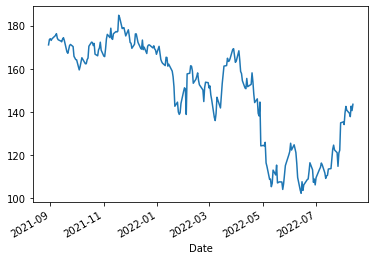

In [36]:
amzn_df['Adj Close'].plot()
plt.show()

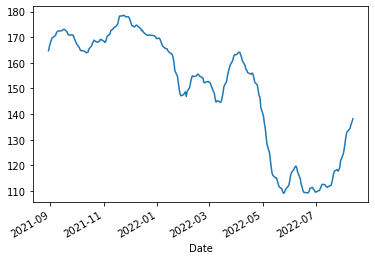

In [37]:
amzn_df['EMA_10'].plot()
plt.show()

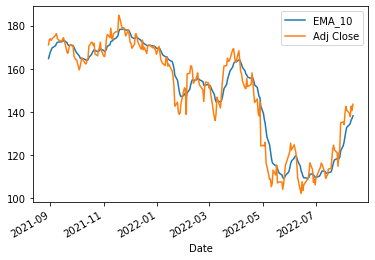

In [38]:
amzn_df[['EMA_10', 'Adj Close']].plot()
plt.show()

In [39]:
# lets test train split 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(amzn_df[['Adj Close']], amzn_df[['EMA_10']], test_size=.2)


In [45]:
print(X_test.describe())

        Adj Close
count   49.000000
mean   151.230307
std     23.158997
min    105.372002
25%    134.160004
50%    161.485992
75%    170.451004
max    183.828506


In [46]:
print(X_train.describe())

        Adj Close
count  192.000000
mean   148.759214
std     23.754435
min    102.309998
25%    125.330752
50%    154.909752
75%    169.118629
max    184.802994


In [48]:
# Create Regression Model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Use model to make predictions
y_pred = model.predict(X_test)

In [50]:
# new stuff 
# Printout relevant metrics
print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.93398189]]
Mean Absolute Error: 4.223120294893919
Coefficient of Determination: 0.9462515104425716


In [ ]:
#lower MAE = better, want closer to one

In [ ]:
#Refernces: yahoo finance,(2022). Z.west, (2022).